In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [22]:
N = 10_000
offset = 0.3
event_duration = 300

x = np.ones(N)*offset
index = np.arange(N)
t = np.arange(0, event_duration)

for i in range(0, 10_000, 2_000):
    j = np.random.randint(0, 1_500)
    x[i+j:i+j+event_duration] = np.sin(t) + offset

noise = np.random.normal(0, 0.0001, N)

x = x + noise

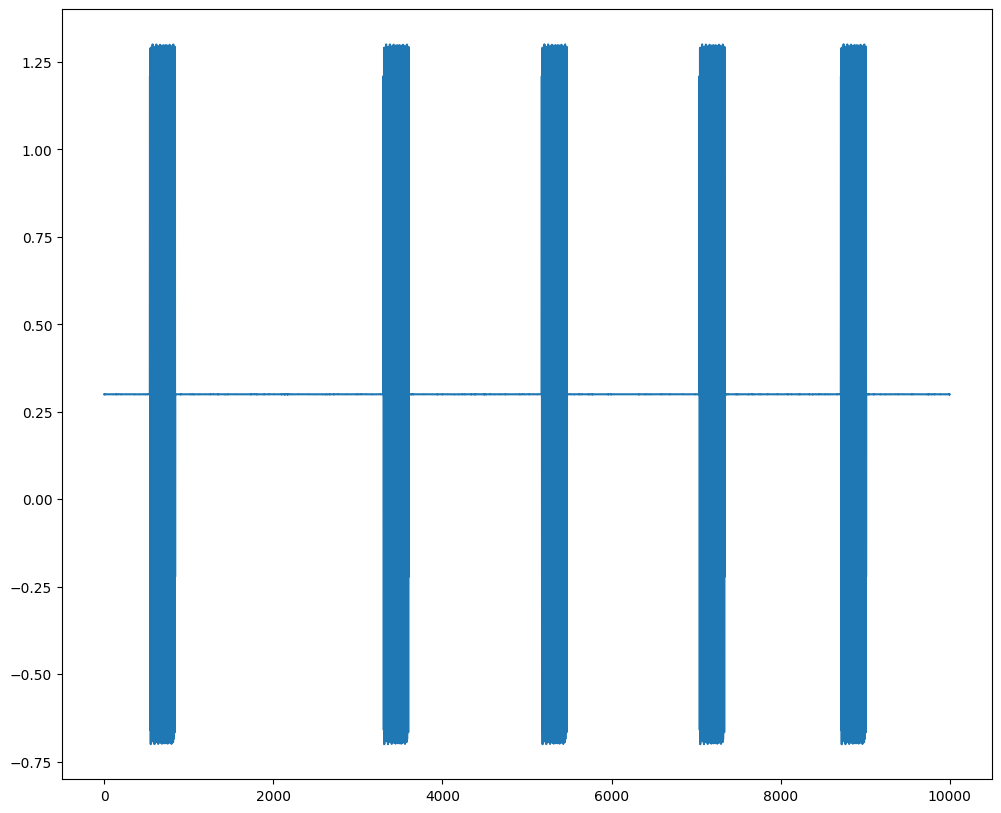

In [23]:
plt.figure(figsize=(12, 10))
plt.plot(index, x)
plt.show()

In [24]:
x_backup = x

In [25]:
x = x - np.mean(x[:10])

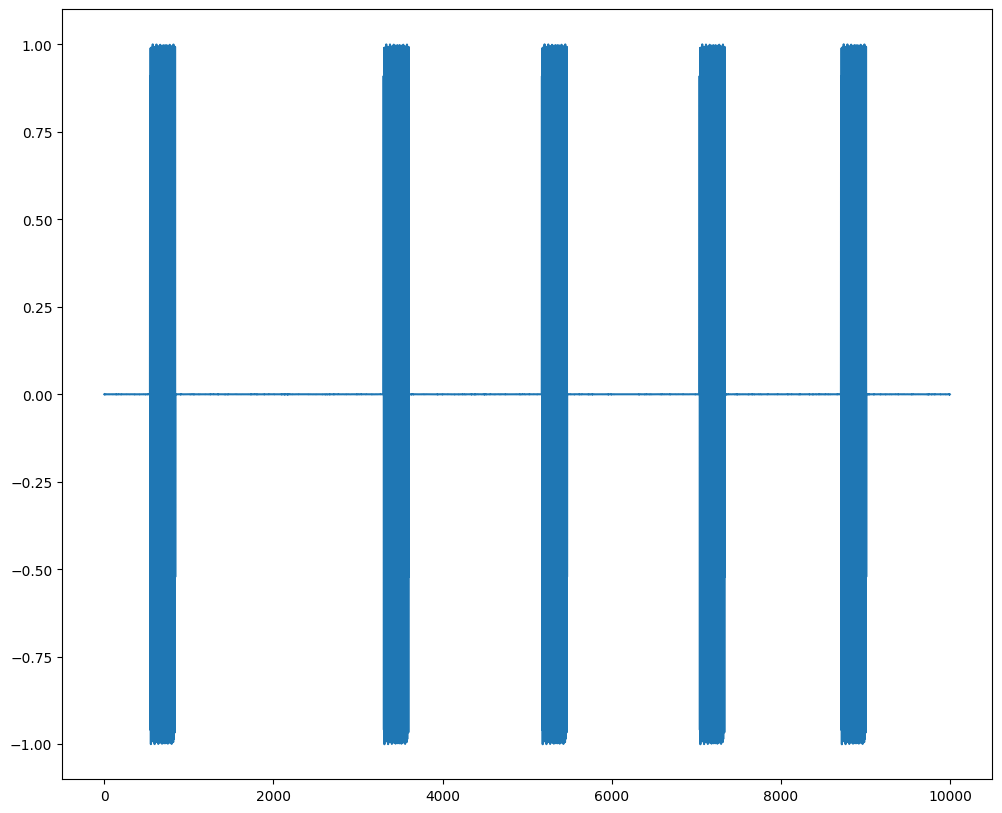

In [27]:
plt.figure(figsize=(12, 10))
plt.plot(index, x)
plt.show()

In [28]:
x = x**2

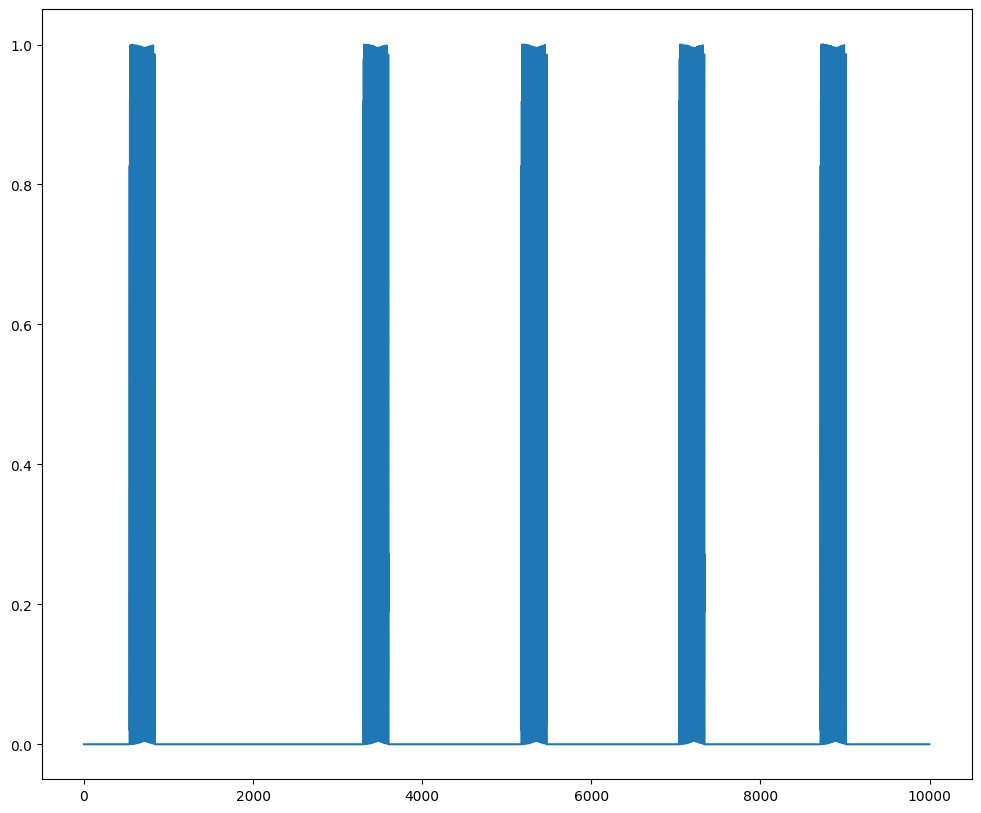

In [30]:
plt.figure(figsize=(12, 10))
plt.plot(index, x)
plt.show()

In [31]:
def moving_average(x, N):
    return np.convolve(x, np.ones(N), 'same') / N

In [32]:
x = moving_average(x, 10)

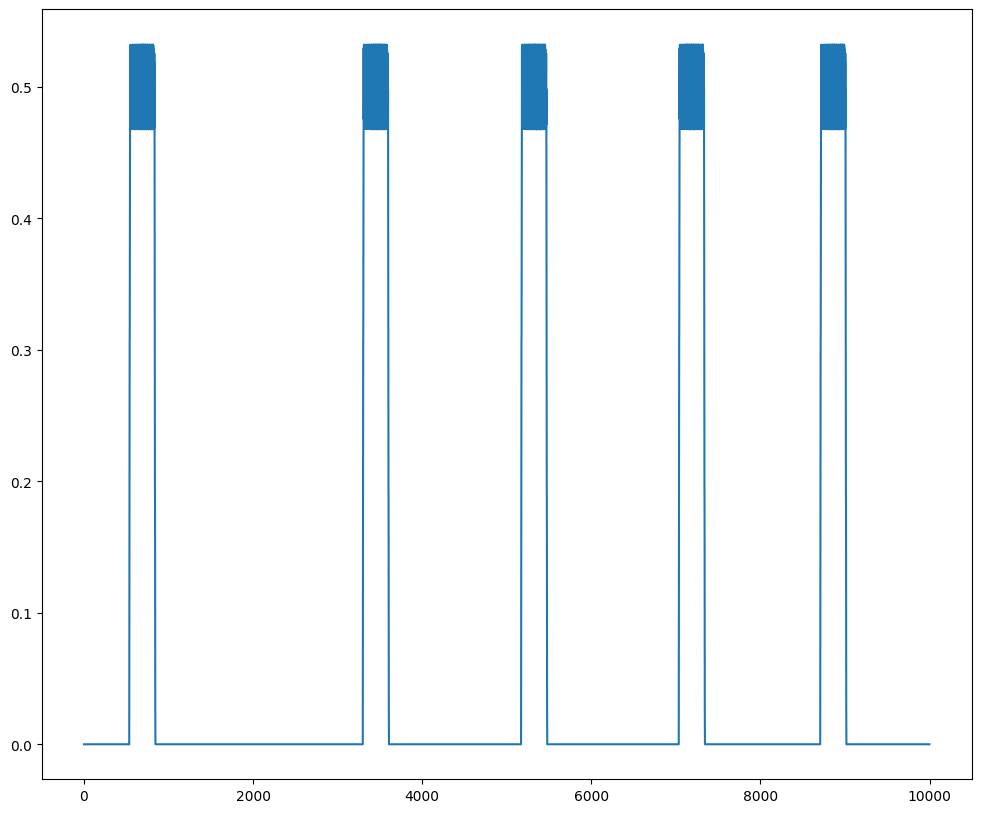

In [33]:
plt.figure(figsize=(12, 10))
plt.plot(index, x)
plt.show()

In [45]:
x[x>0.1] = 1
x[x<0.1] = 0

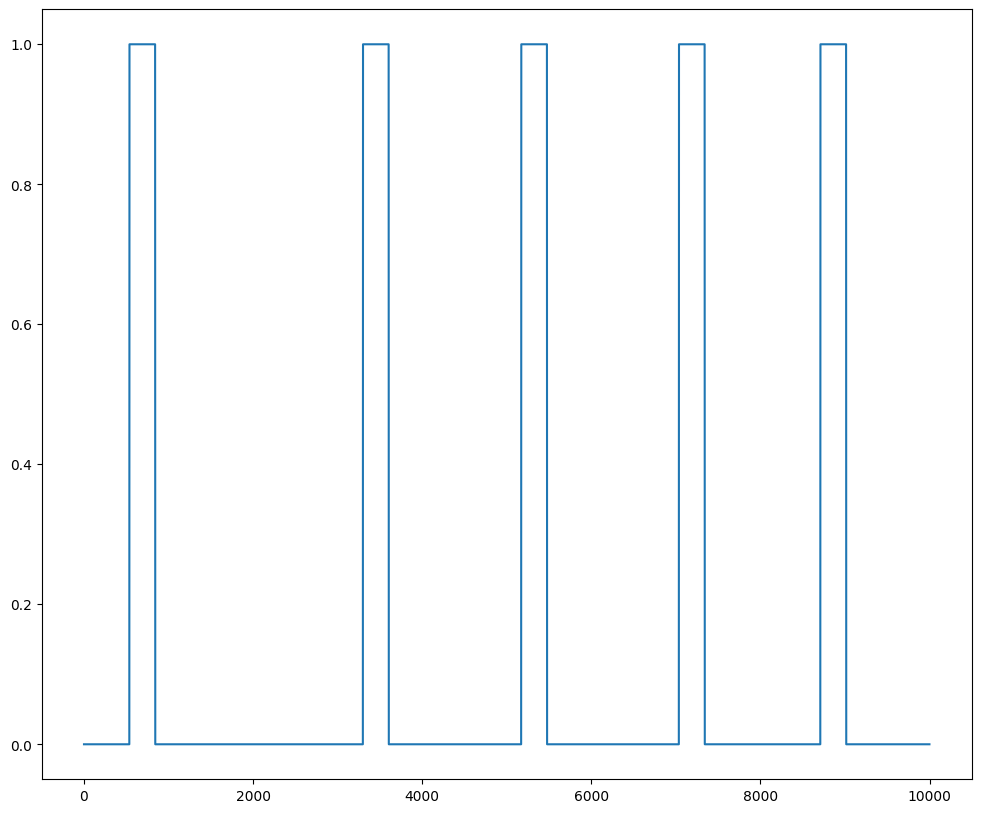

In [46]:
plt.figure(figsize=(12, 10))
plt.plot(index, x)
plt.show()

In [61]:
indices = index[np.append(False, x[1:] - x[:-1]) != 0]
indices
len(indices)

10

In [58]:
indices

array([ 537,  842, 3299, 3604, 5171, 5476, 7036, 7341, 8709, 9014])

In [62]:
list(range(0, len(indices), 2))

[0, 2, 4, 6, 8]

In [64]:
np.arange(1, 6)

array([1, 2, 3, 4, 5])

In [65]:
events = np.zeros(N)

for i, event in zip(range(0, len(indices), 2), np.arange(1, 6)):
    start = indices[i]
    end = indices[i+1]
    events[start:end] = event
    

In [70]:
data = pd.DataFrame({
    "x": x_backup,
    "index": index,
    "event": events
})

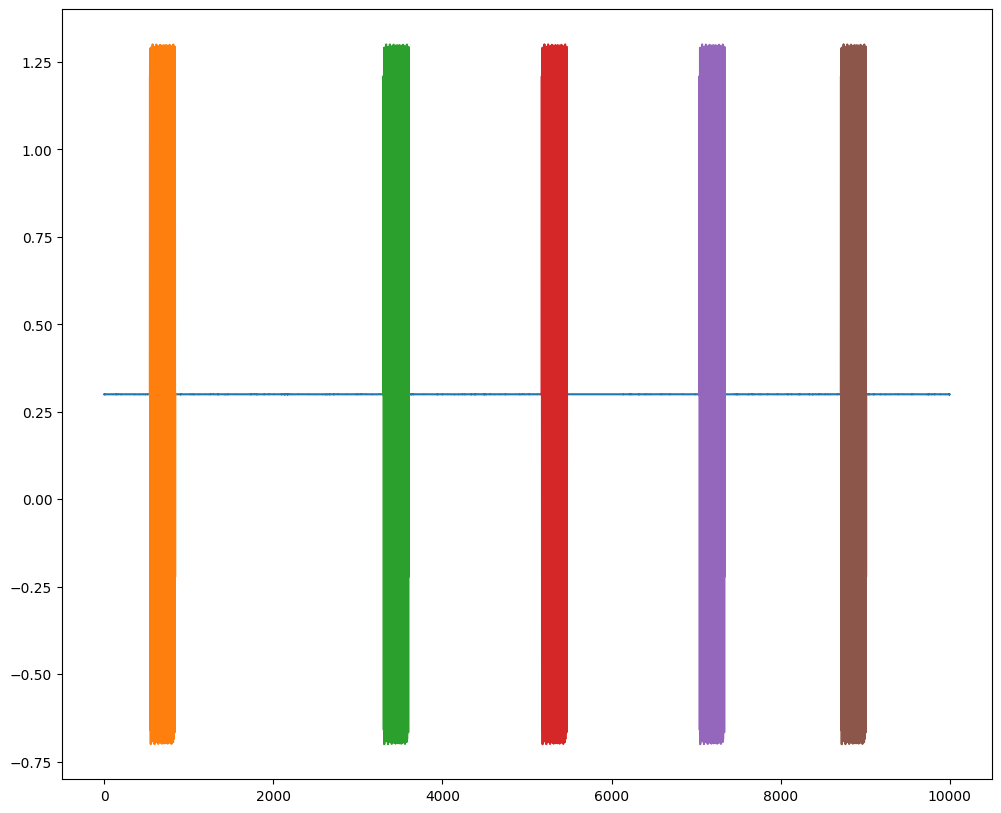

In [71]:
    
plt.figure(figsize=(12, 10))

for event in range(6):

    plt.plot(data.loc[data.event==event, "index"], data.loc[data.event==event, "x"])


plt.show()